In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc
import cv2
import h5py

In [254]:
start_frame_num = 0
total_frame_num = 2000
max_depth = 0

datamin = 0 
datamax = 65535
num_bins = 255
bins = np.linspace(datamin, datamax, num_bins)
hist = np.zeros(num_bins - 1, dtype=np.int64)


depth_data = None
with h5py.File('/media/rapid/50saladsnew_nchw_120p_lzf.h5', 'r') as h5_file:
    for idx in range(start_frame_num, start_frame_num + total_frame_num):
        depth_frame = h5_file['depth'][idx]
        
#         curr_max_depth = np.max(depth_frame) 
        
        hist_curr, _ = np.histogram(depth_frame, bins)
        hist += hist_curr
        
#         if curr_max_depth > max_depth:
#             max_depth = curr_max_depth
#             print("New max depth {}".format(max_depth))
            
#         if curr_max_depth > (25500 + 1275):
#             print("High depth {}".format(curr_max_depth))


In [190]:
for idx, val in enumerate(hist):
    print("{} {}".format(idx, val))

0 111556766
1 8
2 0
3 0
4 0
5 0
6 3
7 0
8 0
9 0
10 0
11 4
12 0
13 0
14 0
15 0
16 17
17 338
18 11972
19 58380
20 41154
21 108682
22 169113
23 325236
24 877949
25 2167278
26 1788592
27 1893644
28 3423745
29 5286536
30 5072791
31 8428825
32 6505047
33 4782794
34 6862332
35 35191141
36 53091617
37 54248732
38 41431550
39 18785851
40 5526745
41 271810
42 130464
43 82323
44 70943
45 64428
46 60721
47 65098
48 51262
49 42688
50 41052
51 36593
52 32834
53 33311
54 24041
55 19172
56 17013
57 16431
58 19258
59 22294
60 22670
61 32150
62 19069
63 23031
64 17480
65 15762
66 11189
67 12986
68 15055
69 11031
70 6535
71 9278
72 10264
73 6254
74 11408
75 30814
76 185189
77 4298922
78 6499911
79 4010866
80 2107
81 914
82 412
83 499
84 169
85 269
86 454
87 516
88 331
89 239
90 92
91 5
92 37
93 19
94 48
95 23
96 47
97 28
98 44
99 8
100 16
101 20
102 3
103 52
104 5
105 12
106 8
107 9
108 9
109 4
110 13
111 11
112 10
113 77
114 14
115 0
116 4
117 12
118 22
119 32
120 75
121 81
122 153
123 425
124 702
125 3

In [240]:
def scale_depth(depth_image):
#     min_depth = 8 * 255
    min_depth = 8 * 255
    max_depth = 108 * 255
    valid_range = max_depth - min_depth + 1
    scaled_depth = depth_image.astype(np.float) - min_depth
#     scaled_depth = np.clip(scaled_depth, 0, valid_range).astype(np.float)
    scaled_depth = scaled_depth / float(valid_range)
    scaled_depth = 255.0 * scaled_depth
    scaled_depth = np.clip(scaled_depth, 0, 255)
    return scaled_depth.astype(np.uint8)

In [265]:
def scale_depth_clip(depth_image):
#     min_depth = 8 * 255
    min_depth = 8 * 255
#     max_depth = 108 * 255
    max_depth = 98 * 255
    valid_range = max_depth - min_depth
    print(np.min(depth_image))
    scaled_depth = np.clip(depth_image, min_depth, max_depth)
    print(np.min(scaled_depth))
    scaled_depth = scaled_depth - min_depth
    print(np.min(scaled_depth))
#     scaled_depth = np.clip(scaled_depth, 0, valid_range).astype(np.float)
    scaled_depth = scaled_depth / float(valid_range)
    scaled_depth = 255.0 * scaled_depth
    scaled_depth = np.clip(scaled_depth, 0, 255)
    return scaled_depth.astype(np.uint8)

0
2040
0
(120, 160, 1)
uint8


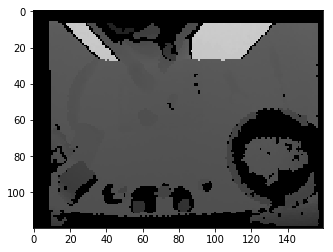

In [266]:
depth_frame_hwc = np.moveaxis(depth_frame, 0, -1)
depth_scaled = scale_depth_clip(depth_frame_hwc)
# depth_scaled = np.moveaxis(depth_scaled, 0, -1)
print(depth_scaled.shape)
print(depth_scaled.dtype)
plt.imshow(cv2.cvtColor(depth_scaled, cv2.COLOR_GRAY2RGB))

In [194]:
# start_frame_num = 208010
start_frame_num = 1000
total_frame_num = 2000
min_depth = 65535

depth_data = None
with h5py.File('/media/rapid/50saladsnew_nchw_120p_lzf.h5', 'r') as h5_file:
    for idx in range(start_frame_num, start_frame_num + total_frame_num):
        depth_frame = h5_file['depth'][idx]
        depth_frame = np.moveaxis(depth_frame, -3, -1)
        depth_frame[(depth_frame[:, :, 0] == 0)] = 65535
        
        curr_min_depth = np.min(depth_frame) 
        
        if curr_min_depth < min_depth:
            min_depth = curr_min_depth
            print("New min depth {}".format(min_depth))
            
        if curr_min_depth < 1275:
            print("Low depth {}".format(curr_min_depth))

New min depth 6010
New min depth 5930
New min depth 5880
New min depth 5790
New min depth 5710
New min depth 5680
New min depth 5430
New min depth 5420
New min depth 4910
New min depth 4640
New min depth 2994


In [142]:
depth_data.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [145]:
hist, _ = np.histogram(depth_frame.astype(np.int32), bins=100)

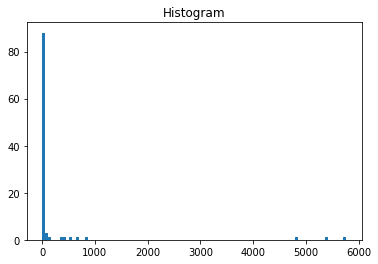

In [147]:
plt.hist(hist, bins=100)
plt.title("Histogram")
plt.show()

In [302]:
test_idx = 1012
with h5py.File('/media/rapid/50saladsnew_nchw_120p_lzf.h5', 'r') as h5_file:
    depth_jet_frame = h5_file['depth_jet'][test_idx]
    depth_jet_frame = np.moveaxis(depth_jet_frame, 0, -1)
    
    norm_frame = h5_file['norm'][test_idx]
    norm_frame = np.moveaxis(norm_frame, 0, -1)
    
    mean_images = np.moveaxis(h5_file['mean'][:], 0, -1)
    norm_mean = np.squeeze(mean_images[0, 0, 6:9])
    print(norm_mean)
    
    depth_mean = np.squeeze(mean_images[0, 0, 3:6])
    print(depth_mean)

[126.63793 109.05014  33.07737]
[  1.3105114   8.857349  206.31215  ]


[  1   8 206]
[126 109  33]


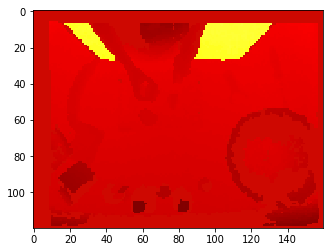

In [304]:
plt.imshow(depth_jet_frame[:,:,::-1])
print(depth_jet_frame[0, 0])
print(norm_frame[0, 0])

In [279]:
depth_mean_valid_values = depth_jet_fram

depth_jet_frame.shape

(120, 160, 3)

In [283]:
depth_mean_valid_values = depth_jet_frame[
    np.logical_not(
        (depth_jet_frame[:, :, 0] == 0) & 
        (depth_jet_frame[:, :, 1] == 0) & 
        (depth_jet_frame[:, :, 2] == 0)
    )
]
print(depth_mean_valid_values.shape)

(13642, 3)


In [278]:
test_idx = 1012
with h5py.File('/media/rapid/50saladsnew_nchw_120p_lzf.h5', 'r') as h5_file:
    flow_frame = h5_file['flowuint8'][test_idx]
    flow_frame = np.moveaxis(flow_frame, 0, -1)
    print(flow_frame)

[[[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]

 [[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]

 [[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]

 ...

 [[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]

 [[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]

 [[129 129 129]
  [129 129 129]
  [129 129 129]
  ...
  [129 129 129]
  [129 129 129]
  [129 129 129]]]


In [102]:
test_frame_num = 102010
with h5py.File('/media/rapid/50saladsnew_nchw_120p_lzf.h5', 'r') as h5_file:
    depth_frame = h5_file['depth'][test_frame_num]

OSError: Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [111]:
depth_frame = depth_frame.reshape(120, 160, 1)

In [115]:
depth_frame.shape
depth_frame.dtype

dtype('uint16')

In [113]:
depth_rgb_frame = np.repeat(depth_frame, 3, -1)

In [165]:
depth_rgb_frame_uint8 = (255 * np.clip(depth_rgb_frame_copy /16383.0, 0, 1.0)).astype(np.uint8)

In [178]:
scaled_depth_rgb_frame_uint8 = scale_depth(depth_rgb_frame)

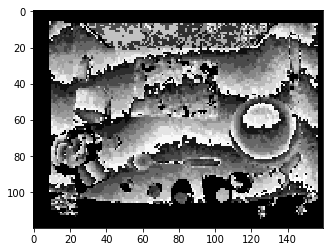

In [180]:
plt.imshow((255.0 * depth_rgb_frame_copy).astype(np.uint8))

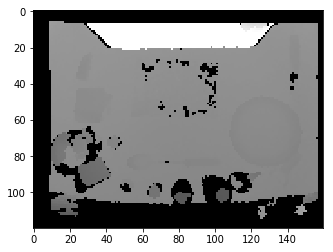

In [175]:
plt.imshow(scaled_depth_rgb_frame_uint8)

In [108]:
black_pixel = np.zeros(3, np.uint16)

In [149]:
depth_rgb_frame_uint8[
    (depth_rgb_frame_uint8[:, :, 0] == 51) & 
    (depth_rgb_frame_uint8[:, :, 1] == 51) & 
    (depth_rgb_frame_uint8[:, :, 2] == 51)
] = 0

In [20]:
depth = depth * 3

In [98]:
depth_jet = cv2.applyColorMap(depth_frame, cv2.COLORMAP_JET)

error: OpenCV(3.4.2) /home/sean/Documents/Repos/opencv/modules/imgproc/src/colormap.cpp:516: error: (-5:Bad argument) cv::ColorMap only supports source images of type CV_8UC1 or CV_8UC3 in function 'operator()'


In [96]:
depth_jet.shape

NameError: name 'depth_jet' is not defined

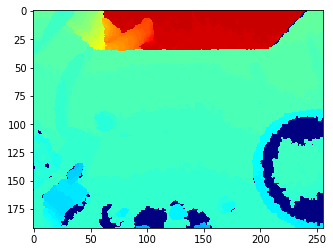

In [25]:
plt.imshow(depth_jet[:, :, ::-1])

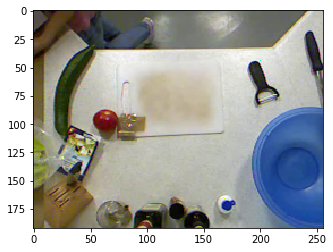

In [94]:
plt.imshow(rgb)

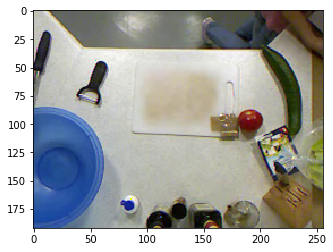

In [95]:
rgb_flip = rgb[:, ::-1, :]
plt.imshow(rgb_flip)

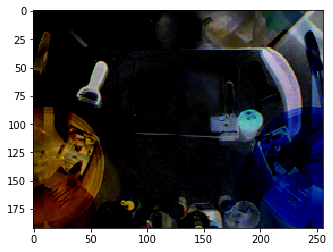

In [96]:
rgb_diff = rgb.astype(np.float32) - rgb_flip.astype(np.float32)
rgb_diff = np.clip(rgb_diff, 0, 255).astype(np.uint8)

plt.imshow(rgb_diff)

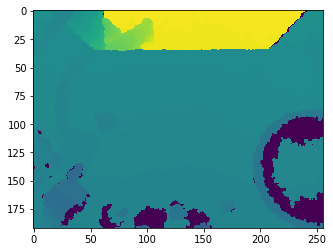

In [97]:
plt.imshow(depth)

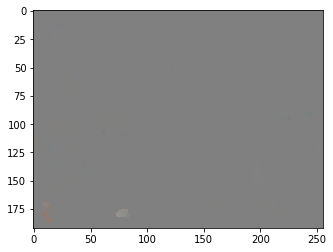

In [98]:
plt.imshow(flow)

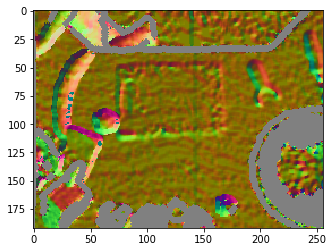

In [100]:
plt.imshow(norms)

In [89]:
plt.imshow(curvature)

In [91]:
def load_pgm_file(file_path):
    with open(file_path, 'rb') as pgm_file:
        pgm_dims = bytearray(pgm_file.readline())
        pgm_dims = pgm_dims.decode('utf-8').split()
        print(pgm_dims)
        width = int(pgm_dims[1])
        height = int(pgm_dims[2])
        max_val = int(pgm_dims[3])
        print(height, width, max_val)
        depth = np.fromfile(pgm_file, dtype=np.uint16, count=height*width)
        depth = depth.reshape((height, width))
        return depth

In [94]:
depth = load_pgm_file('/media/bulk/data/50saladsnew/01-1/depth_pgm/0000000032101218-d.pgm')

['P5', '640', '480', '65535']
640 480 65535


In [107]:
print(depth.shape)
print(depth.dtype)
np.all(np.isfinite(depth))
depth_small = cv2.resize(depth, dsize=(320, 240),interpolation=cv2.INTER_NEAREST)
print(depth_small.shape)

(480, 640)
uint16
(240, 320)


In [100]:
depth_image = scipy.misc.toimage(depth)

/home/sean/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


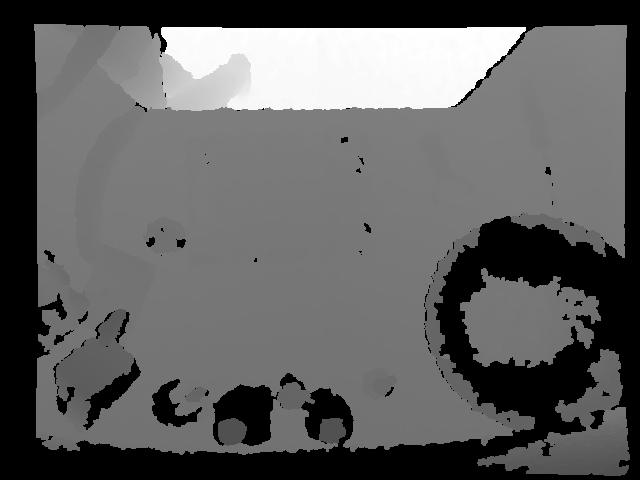

In [101]:
depth_image

(240, 320)

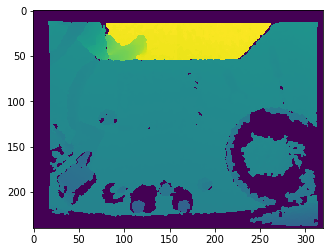

In [108]:
plt.imshow(depth_small)
depth_small.shape

In [88]:
color_image = cv2.imread('/media/bulk/data/50saladsnew/01-1/rgb/0000000032101164.png')

(240, 320, 3)


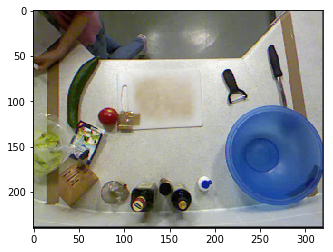

In [89]:
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
plt.imshow(color_image_rgb)
print(color_image_rgb.shape)